##🎯 Objetivo
###Prever se um cliente será inadimplente (não pagará) ou bom pagador, com base em características como idade, limite de crédito, histórico de pagamento, entre outras.

##❓ Por que usar Regressão Logística?
###Porque:

###O problema é de classificação binária (inadimplente = 1, bom pagador = 0).

###A regressão logística é simples, interpretável e uma boa baseline.

###Permite entender a influência de cada variável na previsão.

In [1]:
import pandas as pd

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

dados = pd.read_excel(url, header=1)

In [3]:
dados

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


##🔍 Etapa 3: Análise Exploratória de Dados (EDA)
###O que fazemos aqui:
###Entendemos as variáveis.

###Identificamos valores faltantes ou outliers.

###Verificamos o balanceamento da classe alvo.

In [4]:
print(dados.shape)
dados.info()
dados['default payment next month'].value_counts(normalize=True)

(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64

,proportion
default payment next month,
0,0.7788
1,0.2212


##🧹 Etapa 4: Pré-processamento
###1. Renomear a variável alvo

In [5]:
dados.rename(columns={'default payment next month': 'default'}, inplace=True)

###2. Separar variáveis de entrada (X) e saída (y)

In [6]:
X = dados.drop(['ID', 'default'], axis=1)
y = dados['default']

###Por que removemos o ID?

###Não tem valor preditivo — é só um identificador.

###3. Padronizar variáveis (StandardScaler)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###Por que escalar os dados?

###A regressão logística é sensível à escala das variáveis.

###Evita que variáveis com números maiores dominem as menores.

In [8]:
X_scaled

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

###4. Separar treino e teste

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

###Por que isso é importante?

###Para avaliar o modelo em dados não vistos.

###Usamos 80% para treino e 20% para teste (prática comum).

In [10]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

###Por que max_iter=1000?

###Em datasets grandes, a regressão pode demorar para convergir. Aumentamos o número máximo de iterações para garantir que o modelo finalize o treinamento.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4718
           1       0.67      0.24      0.36      1282

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.63      6000
weighted avg       0.79      0.81      0.78      6000



###Visualizar a matriz de confusão


Text(50.722222222222214, 0.5, 'Real')

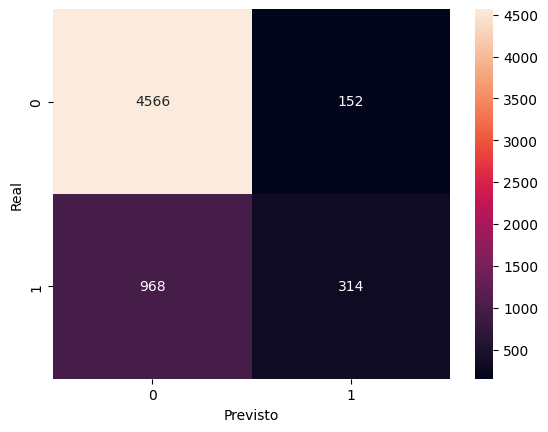

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Previsto')
plt.ylabel('Real')

###Avaliar a curva ROC e AUC


AUC: 0.7204


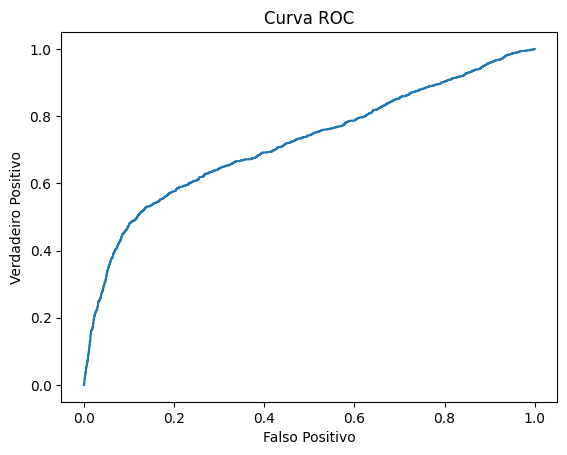

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = modelo.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')

auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {auc:.4f}')